In [ ]:
#Imports Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loads Iris Dataset
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

#Prepares DataFrame
df = pd.DataFrame(data=iris.data,columns=iris.feature_names)
df['Target'] = iris.target

In [3]:
#Explore the Data
print(df.head())
print(df.info())
print(df.describe())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   Target  
0       0  
1       0  
2       0  
3       0  
4       0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Target             150 non-null    int32  
dtypes: float

In [4]:
#Train-Test Split
from sklearn.model_selection import train_test_split
X = df.drop('Target', axis=1) 
y = df['Target']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
#Model Training (KNN)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [6]:
#Prediction and Evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_pred = knn.predict(X_test)
print("Predicted labels:", y_pred)
print("Actual labels:", y_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Predicted labels: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
Actual labels: 73     1
18     0
118    2
78     1
76     1
31     0
64     1
141    2
68     1
82     1
110    2
12     0
36     0
9      0
19     0
56     1
104    2
69     1
55     1
132    2
29     0
127    2
26     0
128    2
131    2
145    2
108    2
143    2
45     0
30     0
Name: Target, dtype: int32
Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



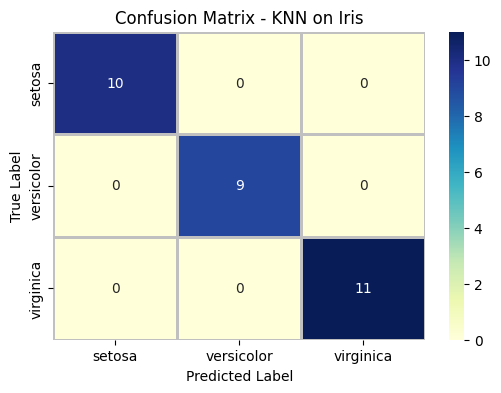

In [10]:
#Heatmap Visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm,annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=target_names, yticklabels=target_names,
            linewidths=1,     
            linecolor='silver')
plt.title("Confusion Matrix - KNN on Iris")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()